<a href="https://colab.research.google.com/github/sumaiya-akter-runa/preproces_drug_addiction_dataset/blob/main/balancing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns # statistical data visualization
get_ipython().run_line_magic('matplotlib', 'inline')
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/balance_dataset/preprosses_drugaddiction.csv")
df1.head(150)


,Age,Gender,Education,Enjoyable with-,Live with,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,...,friends? houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
0,2,1,4,2,0,0,1,2,1,2,...,0,0,0,2,1,1,1,0,1,2
1,2,1,0,0,1,2,1,7,0,2,...,1,0,0,0,1,1,1,1,1,1
2,0,1,0,2,1,2,1,2,1,0,...,1,0,0,2,1,1,1,0,0,2
3,2,1,4,2,1,2,1,7,0,0,...,1,1,0,2,1,1,1,0,1,2
4,2,1,4,0,1,0,0,7,0,2,...,1,1,0,0,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,3,1,4,1,1,1,0,16,0,0,...,0,1,0,1,2,1,1,0,1,1
146,0,0,3,0,0,2,1,10,0,1,...,1,0,0,0,1,1,0,0,0,2
147,2,1,2,2,1,0,1,16,0,1,...,0,0,0,1,1,1,0,2,0,3
148,3,1,0,0,1,1,0,16,0,2,...,1,1,0,1,1,0,0,1,1,1


In [ ]:
# Class count for 'Suicidal thoughts'
count_class_0, count_class_1 = df1['Suicidal thoughts'].value_counts()

# Divide by class based on 'Suicidal thoughts'
df1_class_0 = df1[df1['Suicidal thoughts'] == 0]
df1_class_1 = df1[df1['Suicidal thoughts'] == 1]

# Print out the sizes of each class subset to verify
print("Number of entries where 'Suicidal thoughts' is 0:", df1_class_0.shape[0])
print("Number of entries where 'Suicidal thoughts' is 1:", df1_class_1.shape[0])

Number of entries where 'Suicidal thoughts' is 0: 137
Number of entries where 'Suicidal thoughts' is 1: 68


In [ ]:
# Undersample 0-class (having more instances) to match the number of 1-class instances
df1_class_0_under = df1_class_0.sample(count_class_1)

# Concatenate the undersampled DataFrame of 0-class with the 1-class DataFrame
df1_test_under = pd.concat([df1_class_0_under, df1_class_1], axis=0)

# Print the new class distribution to verify undersampling
print('Random under-sampling:')
print(df1_test_under['Suicidal thoughts'].value_counts())

Random under-sampling:
Suicidal thoughts
0    68
1    68
Name: count, dtype: int64


In [ ]:
# Correct variable names
X = df1_test_under.drop('Suicidal thoughts', axis='columns')
y = df1_test_under['Suicidal thoughts']

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Optionally, print the sizes of the resulting datasets to verify
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 108
Test set size: 28


In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Suicidal thoughts,
1,54
0,54


Number of entries where 'Suicidal thoughts' is 0: 137
Number of entries where 'Suicidal thoughts' is 1: 68
Random under-sampling:
Suicidal thoughts
0    68
1    68
Name: count, dtype: int64
Output for split 1
5 out of 14 predictions correct
Accuracy: 0.35714285714285715
[[3 4]
 [5 2]]
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.33      0.29      0.31         7

    accuracy                           0.36        14
   macro avg       0.35      0.36      0.35        14
weighted avg       0.35      0.36      0.35        14



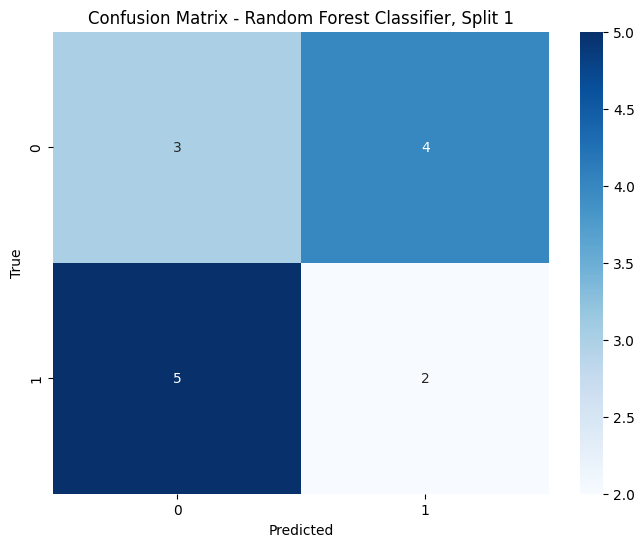

Output for split 2
10 out of 14 predictions correct
Accuracy: 0.7142857142857143
[[5 2]
 [2 5]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



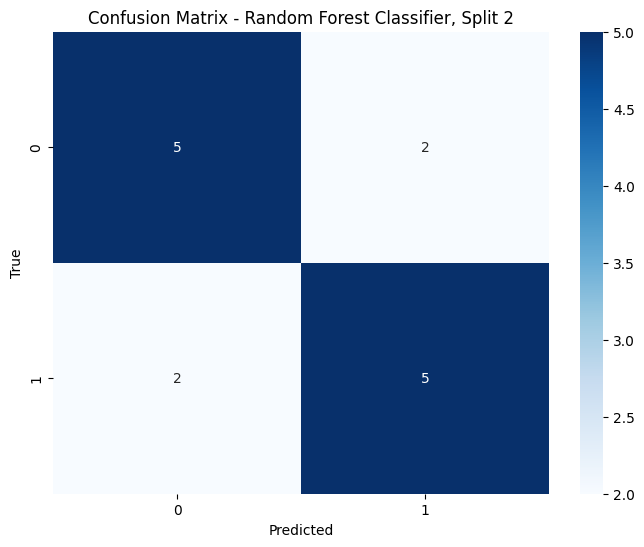

Output for split 3
8 out of 14 predictions correct
Accuracy: 0.5714285714285714
[[2 5]
 [1 6]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.55      0.86      0.67         7

    accuracy                           0.57        14
   macro avg       0.61      0.57      0.53        14
weighted avg       0.61      0.57      0.53        14



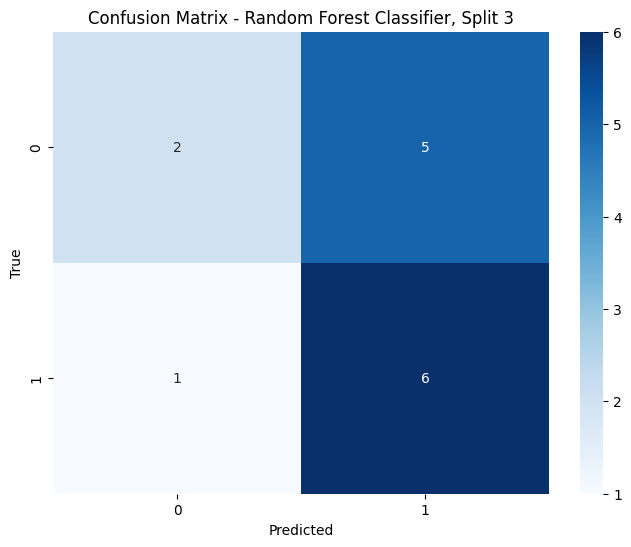

Output for split 4
9 out of 14 predictions correct
Accuracy: 0.6428571428571429
[[5 2]
 [3 4]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.67      0.57      0.62         7

    accuracy                           0.64        14
   macro avg       0.65      0.64      0.64        14
weighted avg       0.65      0.64      0.64        14



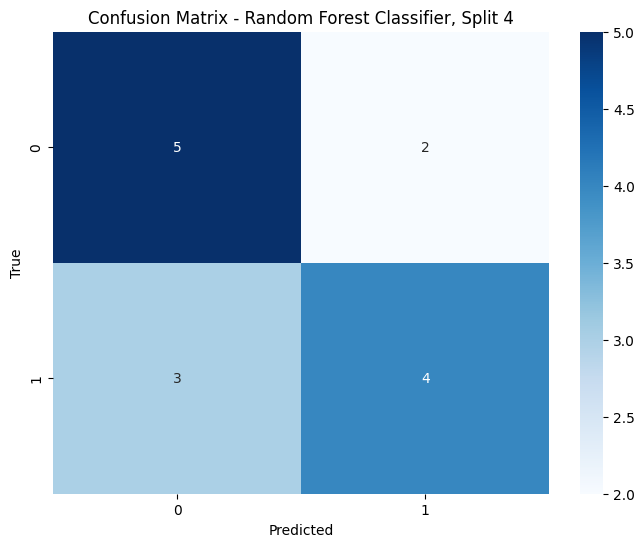

Output for split 5
10 out of 14 predictions correct
Accuracy: 0.7142857142857143
[[4 3]
 [1 6]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.67      0.86      0.75         7

    accuracy                           0.71        14
   macro avg       0.73      0.71      0.71        14
weighted avg       0.73      0.71      0.71        14



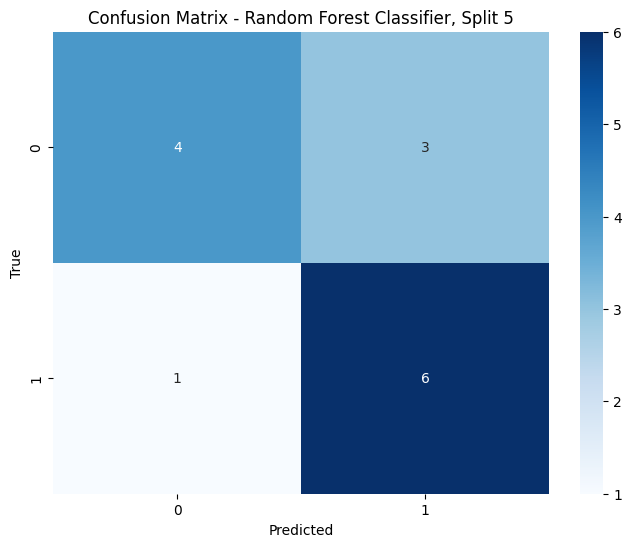

Output for split 6
6 out of 14 predictions correct
Accuracy: 0.42857142857142855
[[2 5]
 [3 4]]
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.44      0.57      0.50         7

    accuracy                           0.43        14
   macro avg       0.42      0.43      0.42        14
weighted avg       0.42      0.43      0.42        14



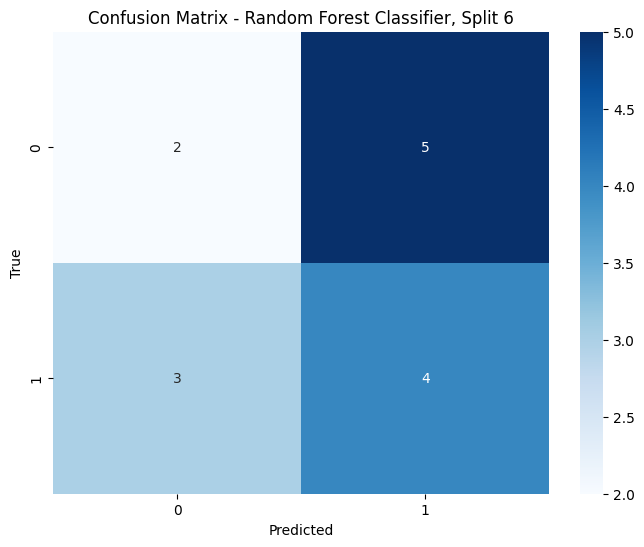

Output for split 7
11 out of 13 predictions correct
Accuracy: 0.8461538461538461
[[6 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.83      0.83         6

    accuracy                           0.85        13
   macro avg       0.85      0.85      0.85        13
weighted avg       0.85      0.85      0.85        13



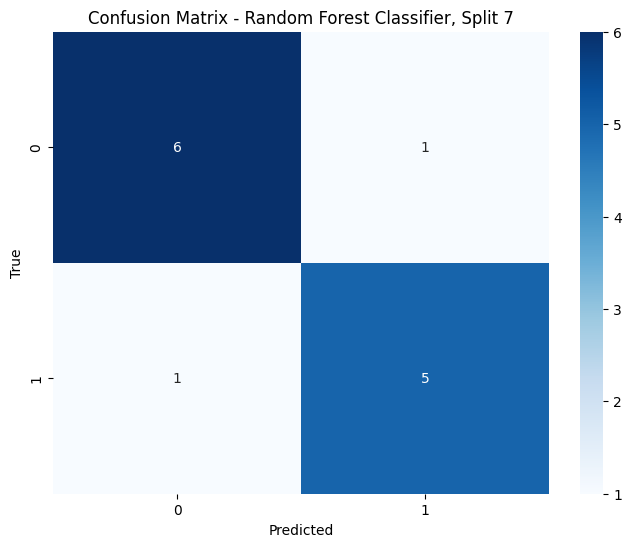

Output for split 8
8 out of 13 predictions correct
Accuracy: 0.6153846153846154
[[4 3]
 [2 4]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.57      0.67      0.62         6

    accuracy                           0.62        13
   macro avg       0.62      0.62      0.62        13
weighted avg       0.62      0.62      0.62        13



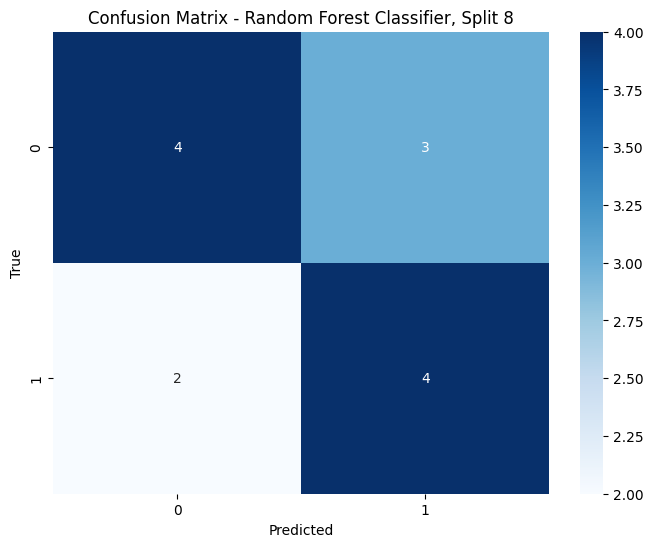

Output for split 9
10 out of 13 predictions correct
Accuracy: 0.7692307692307693
[[5 1]
 [2 5]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



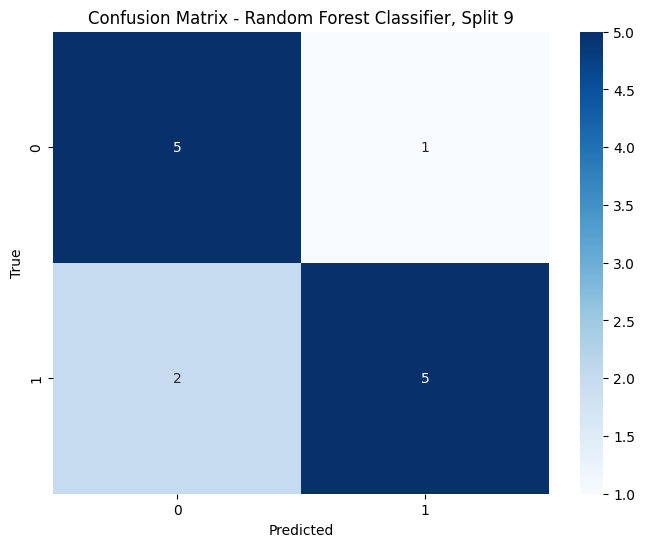

Output for split 10
10 out of 13 predictions correct
Accuracy: 0.7692307692307693
[[5 1]
 [2 5]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



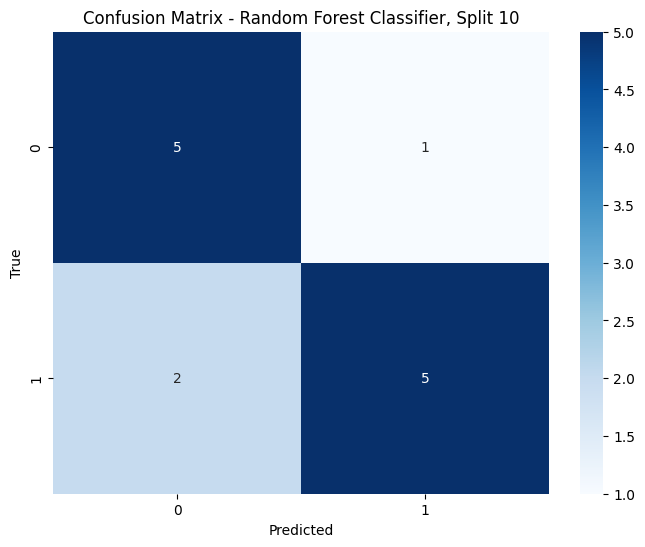

Final mean accuracy: 0.6428571428571429
Best single split accuracy: 0.8461538461538461


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df1 is your DataFrame and 'Suicidal thoughts' is the binary target column
# Class count for 'Suicidal thoughts'
count_class_0, count_class_1 = df1['Suicidal thoughts'].value_counts()

# Divide by class based on 'Suicidal thoughts'
df1_class_0 = df1[df1['Suicidal thoughts'] == 0]
df1_class_1 = df1[df1['Suicidal thoughts'] == 1]

# Optionally, print out the sizes of each class subset to verify
print("Number of entries where 'Suicidal thoughts' is 0:", df1_class_0.shape[0])
print("Number of entries where 'Suicidal thoughts' is 1:", df1_class_1.shape[0])

# Undersample 0-class to match the number of 1-class instances
df1_class_0_under = df1_class_0.sample(count_class_1, random_state=42)

# Concatenate the undersampled DataFrame of 0-class with the 1-class DataFrame
df1_test_under = pd.concat([df1_class_0_under, df1_class_1], axis=0)

# Print the new class distribution to verify undersampling
print('Random under-sampling:')
print(df1_test_under['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df1_test_under.drop('Suicidal thoughts', axis='columns')
y = df1_test_under['Suicidal thoughts']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


# Method2: **Oversampling**

In [ ]:
# Assuming df1_class_1 is the minority class and df1_class_0 is the majority class

# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df1_test_over = df1_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df1_test_over['Suicidal thoughts'].value_counts())

Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64


In [ ]:
# Verify the structure of the new DataFrame
print(df1_test_over.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             274 non-null    int64
 1   Gender                          274 non-null    int64
 2   Education                       274 non-null    int64
 3   Enjoyable with-                 274 non-null    int64
 4   Live with                       274 non-null    int64
 5   Spend most time                 274 non-null    int64
 6   Failure in life                 274 non-null    int64
 7   Mental/emotional problem        274 non-null    int64
 8   Suicidal thoughts               274 non-null    int64
 9   Family relationship             274 non-null    int64
 10  Financials of family            274 non-null    int64
 11  Addicted person in family       274 non-null    int64
 12  no. of friends                  274 non-null    int64
 13  Withd

In [ ]:
X = df1_test_over.drop('Suicidal thoughts',axis='columns')
y = df1_test_over['Suicidal thoughts']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Suicidal thoughts,
1,110
0,109


Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64
Output for split 1
18 out of 28 predictions correct
Accuracy: 0.6428571428571429
[[ 8  6]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.62      0.71      0.67        14

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.64        28
weighted avg       0.65      0.64      0.64        28



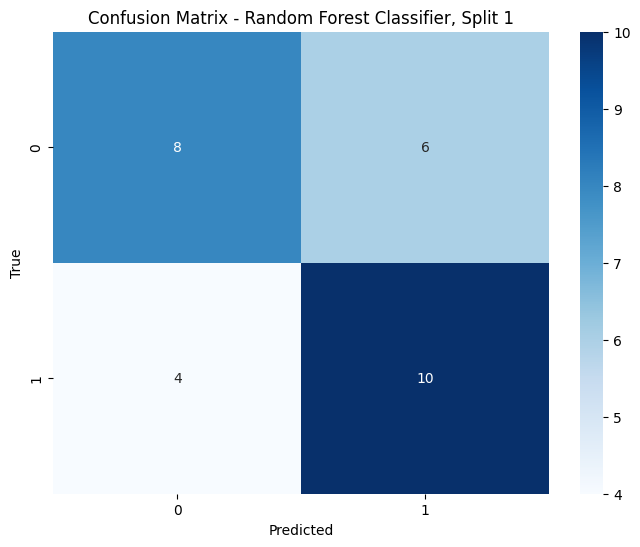

Output for split 2
25 out of 28 predictions correct
Accuracy: 0.8928571428571429
[[11  3]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.82      1.00      0.90        14

    accuracy                           0.89        28
   macro avg       0.91      0.89      0.89        28
weighted avg       0.91      0.89      0.89        28



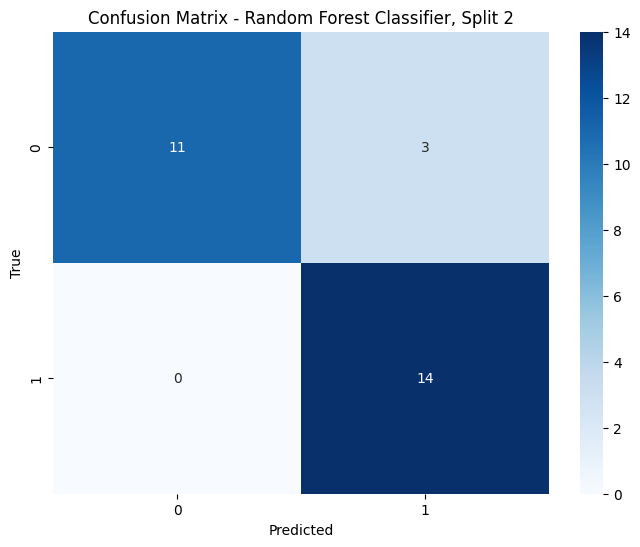

Output for split 3
24 out of 28 predictions correct
Accuracy: 0.8571428571428571
[[10  4]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.78      1.00      0.88        14

    accuracy                           0.86        28
   macro avg       0.89      0.86      0.85        28
weighted avg       0.89      0.86      0.85        28



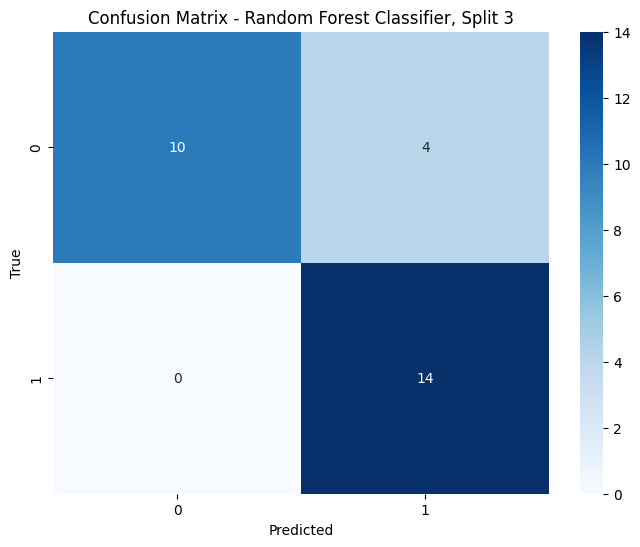

Output for split 4
26 out of 28 predictions correct
Accuracy: 0.9285714285714286
[[12  2]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.88      1.00      0.93        14

    accuracy                           0.93        28
   macro avg       0.94      0.93      0.93        28
weighted avg       0.94      0.93      0.93        28



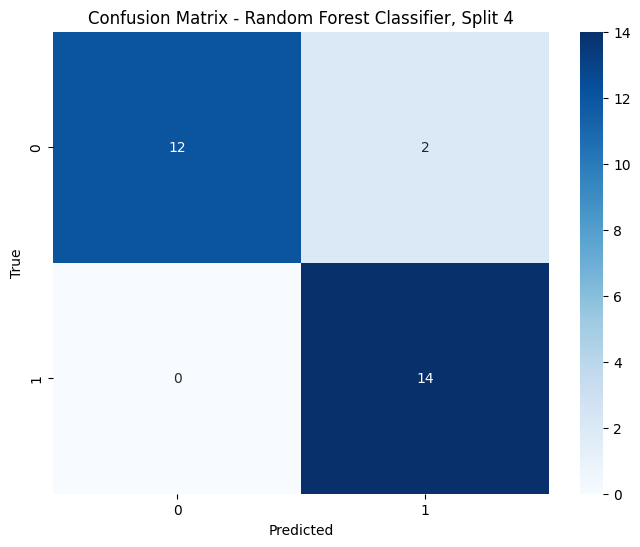

Output for split 5
25 out of 27 predictions correct
Accuracy: 0.9259259259259259
[[12  2]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.87      1.00      0.93        13

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.94      0.93      0.93        27



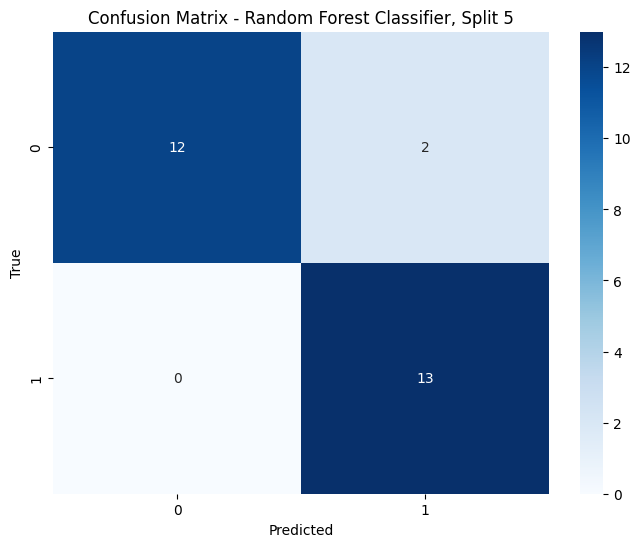

Output for split 6
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[10  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.76      1.00      0.87        13

    accuracy                           0.85        27
   macro avg       0.88      0.86      0.85        27
weighted avg       0.89      0.85      0.85        27



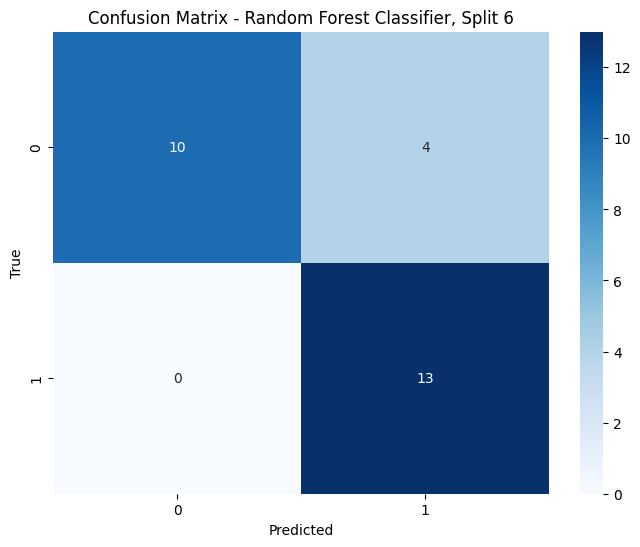

Output for split 7
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[13  1]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.91      0.77      0.83        13

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



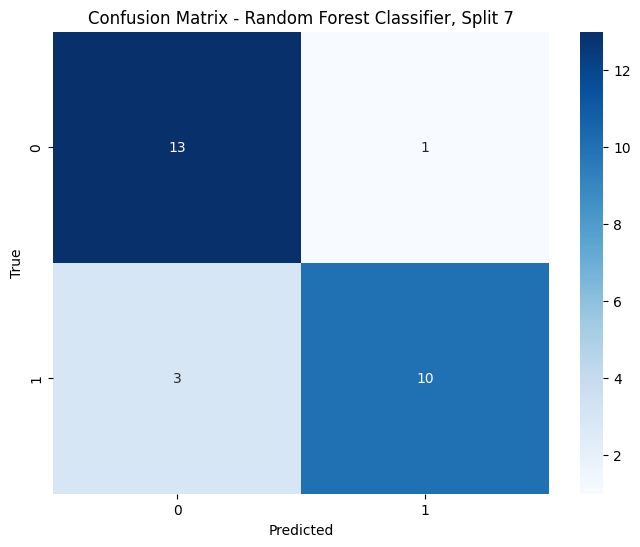

Output for split 8
22 out of 27 predictions correct
Accuracy: 0.8148148148148148
[[10  3]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.80      0.86      0.83        14

    accuracy                           0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27



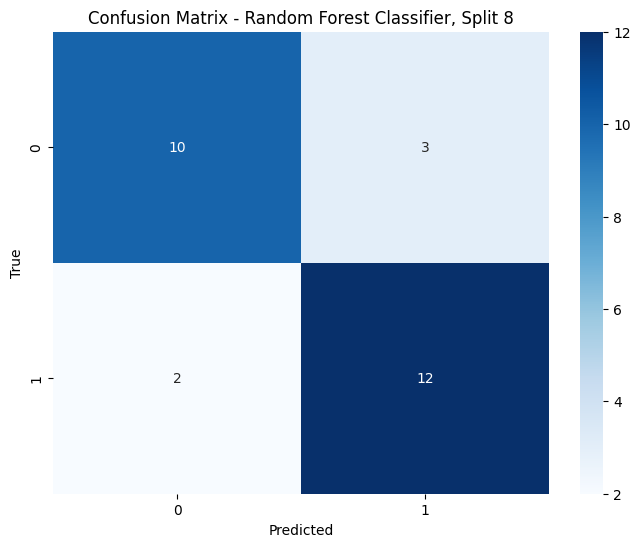

Output for split 9
26 out of 27 predictions correct
Accuracy: 0.9629629629629629
[[13  0]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



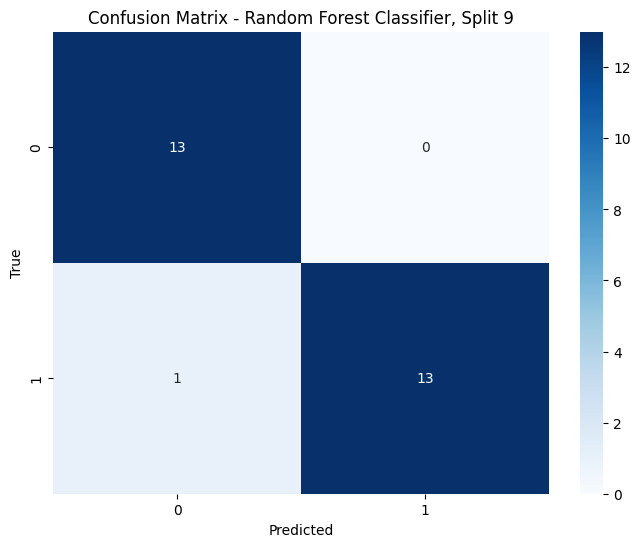

Output for split 10
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[12  1]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



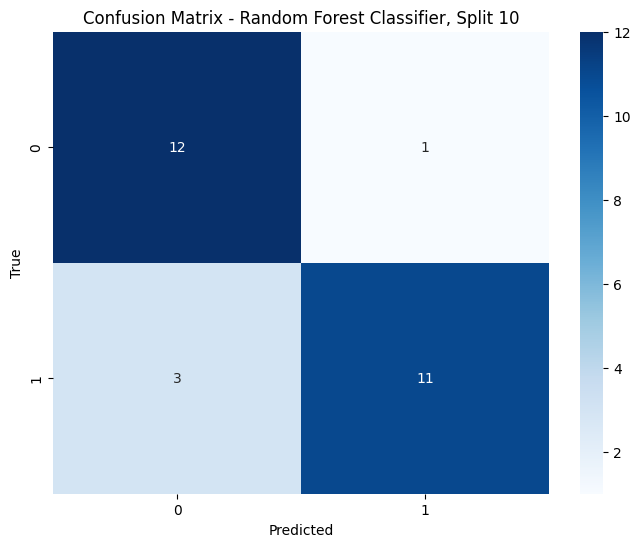

Final mean accuracy: 0.8580687830687831
Best single split accuracy: 0.9629629629629629


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df1_class_1 is the minority class and df1_class_0 is the majority class
# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df1_test_over = df1_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df1_test_over['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df1_test_over.drop('Suicidal thoughts', axis='columns')
y = df1_test_over['Suicidal thoughts']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


# Method3: **SMOTE**

In [ ]:
pip install imbalanced-learn

In [ ]:
df2 = pd.get_dummies(data=df1)
df2.columns

Index(['Age', 'Gender', 'Education', 'Enjoyable with-', 'Live with',
       'Spend most time', 'Failure in life', 'Mental/emotional problem',
       'Suicidal thoughts', 'Family relationship', 'Financials of family',
       'Addicted person in family', 'no. of friends', 'Withdrawal symptoms',
       'friends? houses at night', 'Satisfied with workplace', 'Case in court',
       'Living with drug user', 'Smoking', 'Ever taken drug',
       'Friends influence', 'If chance given to taste drugs',
       'Easy to control use of drug', 'Frequency of drug usage'],
      dtype='object')

In [ ]:
X = df2.drop('Suicidal thoughts',axis='columns')
y = df2['Suicidal thoughts']

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE
X_sm, y_sm = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(y_sm.value_counts())


Suicidal thoughts
1    137
0    137
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

,count
Suicidal thoughts,
1,110
0,109


Output for split 1
28 out of 41 predictions correct
Accuracy: 0.6829268292682927
[[20  7]
 [ 6  8]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.53      0.57      0.55        14

    accuracy                           0.68        41
   macro avg       0.65      0.66      0.65        41
weighted avg       0.69      0.68      0.69        41



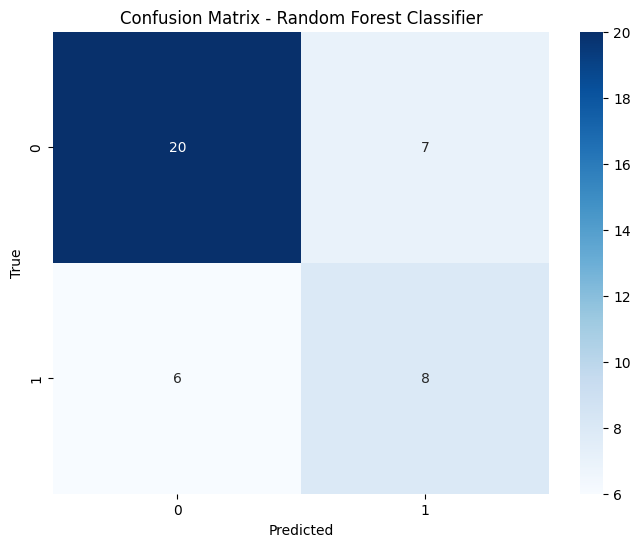

Output for split 2
26 out of 41 predictions correct
Accuracy: 0.6341463414634146
[[17 10]
 [ 5  9]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69        27
           1       0.47      0.64      0.55        14

    accuracy                           0.63        41
   macro avg       0.62      0.64      0.62        41
weighted avg       0.67      0.63      0.64        41



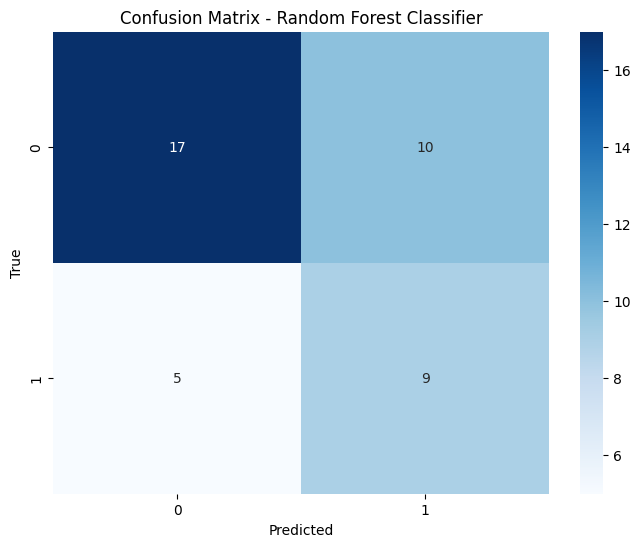

Output for split 3
31 out of 41 predictions correct
Accuracy: 0.7560975609756098
[[23  4]
 [ 6  8]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.67      0.57      0.62        14

    accuracy                           0.76        41
   macro avg       0.73      0.71      0.72        41
weighted avg       0.75      0.76      0.75        41



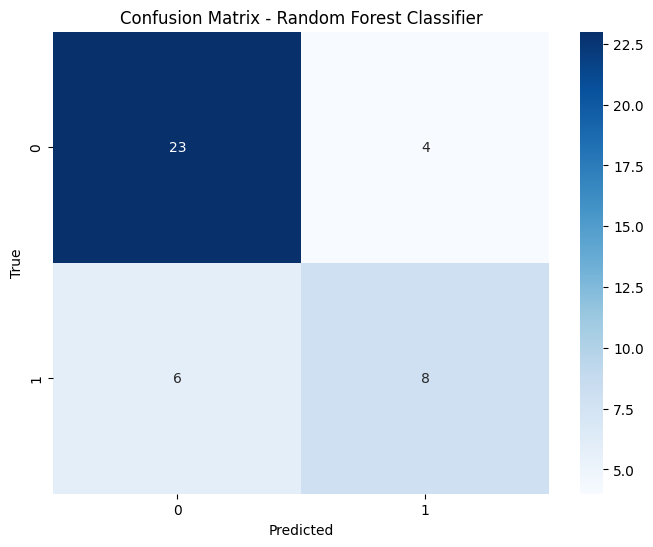

Output for split 4
32 out of 41 predictions correct
Accuracy: 0.7804878048780488
[[26  2]
 [ 7  6]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        28
           1       0.75      0.46      0.57        13

    accuracy                           0.78        41
   macro avg       0.77      0.70      0.71        41
weighted avg       0.78      0.78      0.76        41



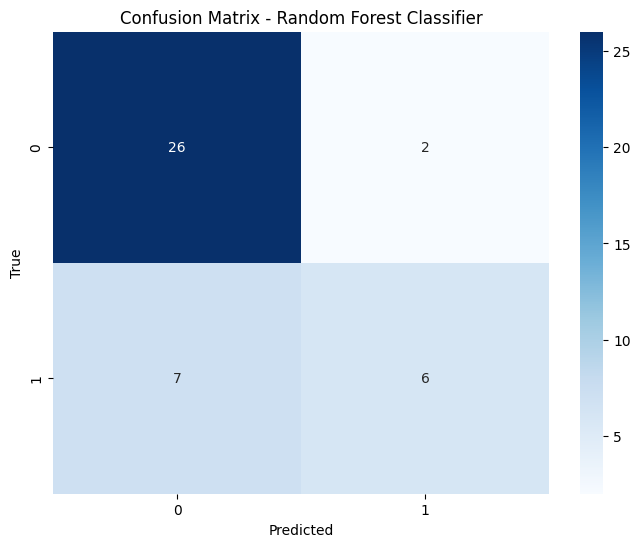

Output for split 5
28 out of 41 predictions correct
Accuracy: 0.6829268292682927
[[22  6]
 [ 7  6]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.50      0.46      0.48        13

    accuracy                           0.68        41
   macro avg       0.63      0.62      0.63        41
weighted avg       0.68      0.68      0.68        41



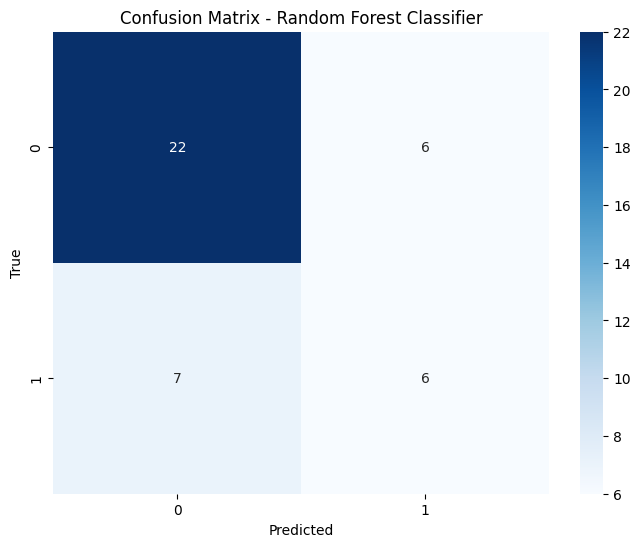

Final mean result: 0.7073170731707317
Best accuracy: 0.7804878048780488


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined as:
# X = df2.drop('Suicidal thoughts', axis='columns')
# y = df2['Suicidal thoughts']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority')

if __name__ == "__main__":
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    accuracies = []  # To store accuracy for each fold

    for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE to the training data only
        X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

        print(f"Output for split {i}")

        clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
        clf.fit(X_train_sm, y_train_sm)  # Train on the resampled train set
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
        print("Accuracy:", accuracy)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix - Random Forest Classifier')
        plt.show()

    print("Final mean result:", np.mean(accuracies))
    print("Best accuracy:", np.max(accuracies))


# SMOTE+Oversampling=**Ensemble**

In [ ]:
df2['Suicidal thoughts'].value_counts()

,count
Suicidal thoughts,
0,137
1,68


In [ ]:
# Regain Original features and labels
X = df2.drop('Suicidal thoughts',axis='columns')
y = df2['Suicidal thoughts']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

,count
Suicidal thoughts,
0,110
1,54


In [ ]:
df3 = X_train.copy()
df3['Suicidal thoughts'] = y_train

In [ ]:
df3.head()

,Age,Gender,Education,Enjoyable with-,Live with,Spend most time,Failure in life,Mental/emotional problem,Family relationship,Financials of family,...,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage,Suicidal thoughts
99,2,0,4,2,0,2,1,4,0,0,...,1,0,2,1,1,1,0,1,3,1
58,2,1,4,0,1,1,0,8,2,0,...,1,0,0,2,0,0,2,0,0,0
70,0,0,4,0,1,2,0,6,1,3,...,0,0,0,0,0,0,2,1,0,0
112,3,0,4,1,1,2,1,3,0,0,...,1,0,2,0,0,0,2,1,1,1
62,2,1,4,0,1,0,0,2,2,0,...,1,0,2,0,0,0,2,1,0,1


In [ ]:
# Let's assume your DataFrame is named df and not df3
df_class0 = df1[df1['Suicidal thoughts'] == 0]
df_class1 = df1[df1['Suicidal thoughts'] == 1]

In [ ]:


# Define the function to get training batches
def get_train_batch(df_majority, df_minority, start, end):
    # Concatenate a slice of the majority class with all of the minority class data
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    # Shuffle the training data to mix minority and majority class data
    df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)

    # Split the features and target variable
    X_train = df_train.drop('Suicidal thoughts', axis='columns')
    y_train = df_train['Suicidal thoughts']
    return X_train, y_train

# Example of getting a train batch
X_train, y_train = get_train_batch(df_class0, df_class1, 1, 110)


In [ ]:
print(y_train.value_counts())  # Check the distribution of classes in the training batch


Suicidal thoughts
0    109
1     68
Name: count, dtype: int64


Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64
Split 1: 18 out of 28 predictions correct, Accuracy: 0.64


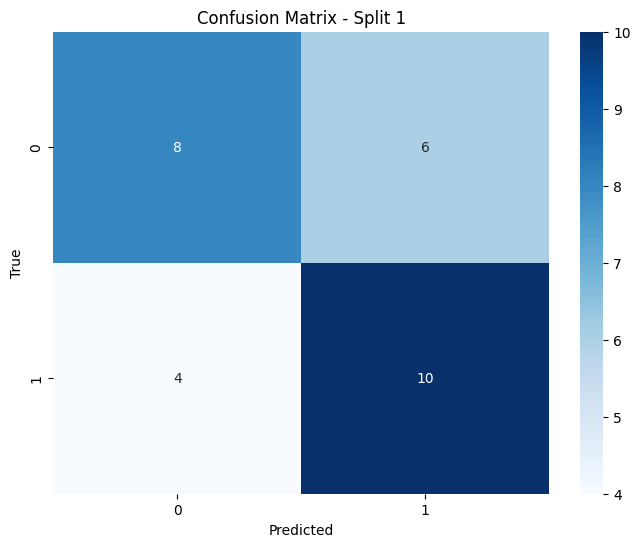

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.62      0.71      0.67        14

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.64        28
weighted avg       0.65      0.64      0.64        28

Split 2: 25 out of 28 predictions correct, Accuracy: 0.89


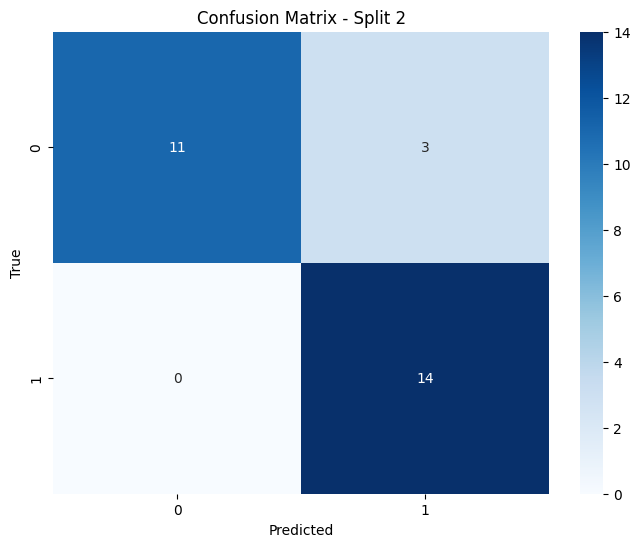

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.82      1.00      0.90        14

    accuracy                           0.89        28
   macro avg       0.91      0.89      0.89        28
weighted avg       0.91      0.89      0.89        28

Split 3: 24 out of 28 predictions correct, Accuracy: 0.86


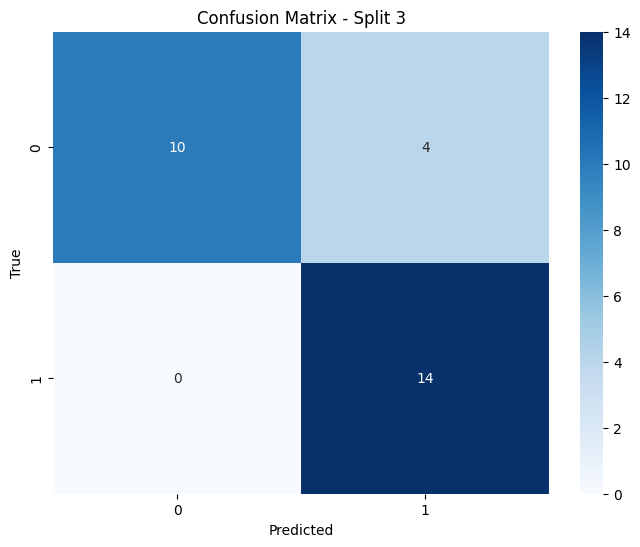

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.78      1.00      0.88        14

    accuracy                           0.86        28
   macro avg       0.89      0.86      0.85        28
weighted avg       0.89      0.86      0.85        28

Split 4: 26 out of 28 predictions correct, Accuracy: 0.93


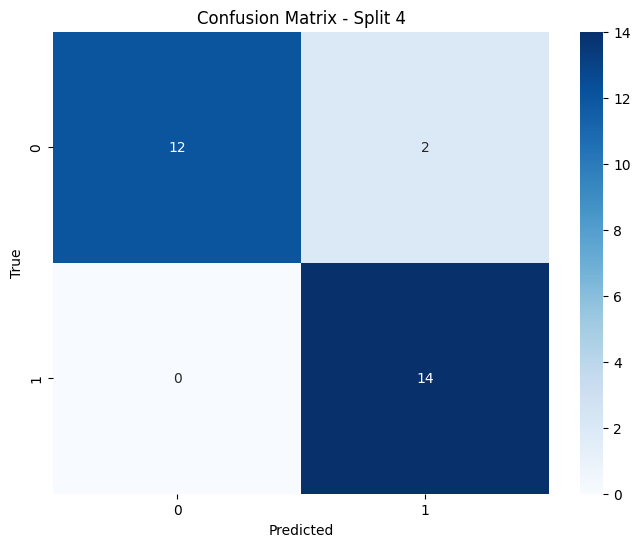

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.88      1.00      0.93        14

    accuracy                           0.93        28
   macro avg       0.94      0.93      0.93        28
weighted avg       0.94      0.93      0.93        28

Split 5: 23 out of 27 predictions correct, Accuracy: 0.85


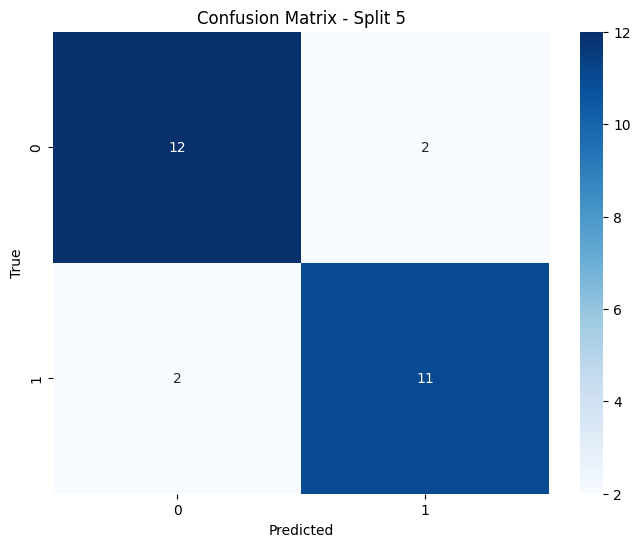

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.85      0.85      0.85        13

    accuracy                           0.85        27
   macro avg       0.85      0.85      0.85        27
weighted avg       0.85      0.85      0.85        27

Split 6: 23 out of 27 predictions correct, Accuracy: 0.85


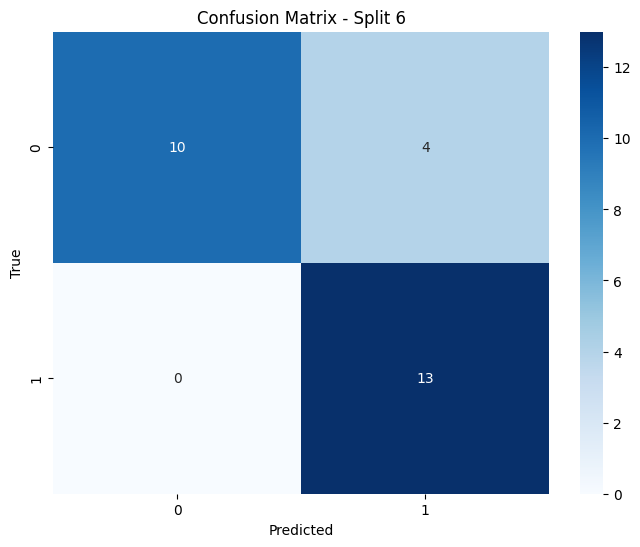

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.76      1.00      0.87        13

    accuracy                           0.85        27
   macro avg       0.88      0.86      0.85        27
weighted avg       0.89      0.85      0.85        27

Split 7: 23 out of 27 predictions correct, Accuracy: 0.85


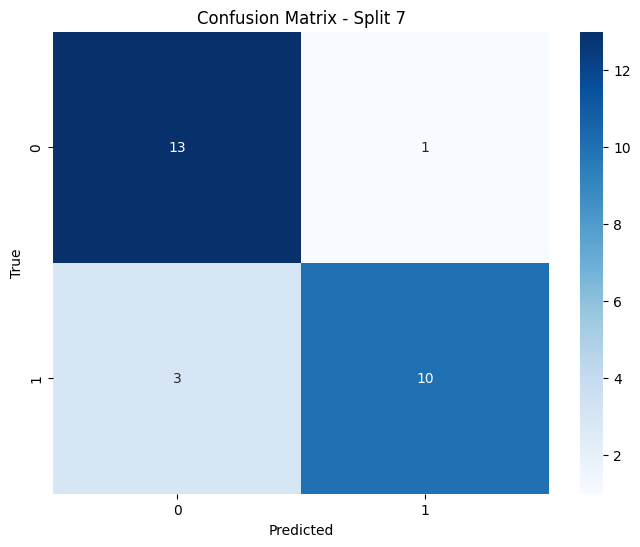

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.91      0.77      0.83        13

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27

Split 8: 22 out of 27 predictions correct, Accuracy: 0.81


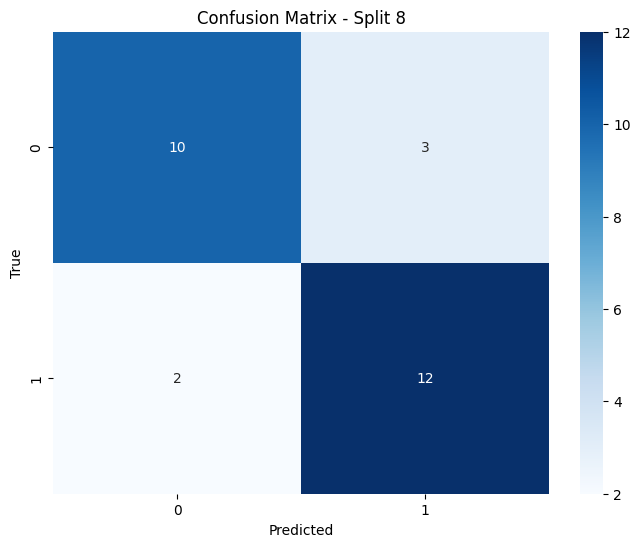

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.80      0.86      0.83        14

    accuracy                           0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27

Split 9: 26 out of 27 predictions correct, Accuracy: 0.96


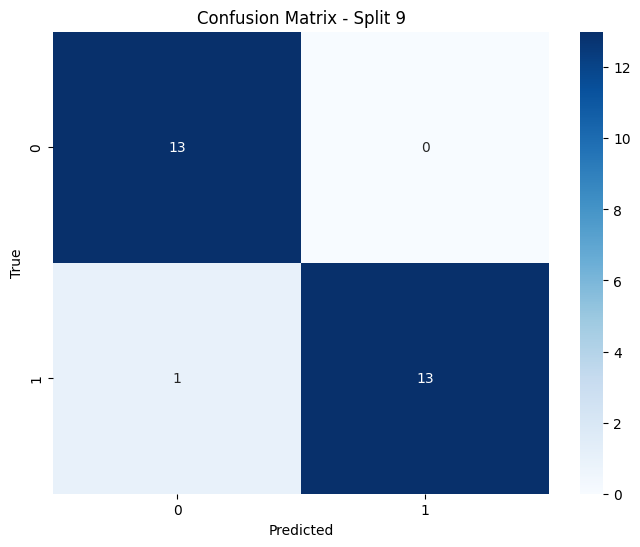

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27

Split 10: 23 out of 27 predictions correct, Accuracy: 0.85


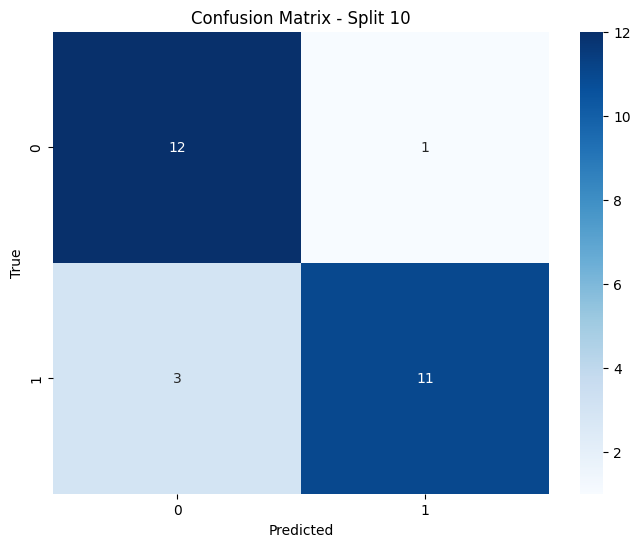

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27

Final mean accuracy: 0.85
Best single split accuracy: 0.96


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Assuming df1_class_1 is the minority class and df1_class_0 is the majority class
# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df1_test_over = df1_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df1_test_over['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df1_test_over.drop('Suicidal thoughts', axis='columns')
y = df1_test_over['Suicidal thoughts']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

# Loop through the splits
for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    # Create training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training data
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

    # Initialize and fit RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train_sm, y_train_sm)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"Split {i}: {np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct, Accuracy: {accuracy:.2f}")

    # Generate and display a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Split {i}')
    plt.show()

    # Output classification report
    print(classification_report(y_test, y_pred))

# Print final mean accuracy and the best single split accuracy
print(f"Final mean accuracy: {np.mean(scores):.2f}")
print(f"Best single split accuracy: {np.max(scores):.2f}")


Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64
Output for split 1
18 out of 28 predictions correct
Accuracy: 0.6428571428571429
[[ 8  6]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.62      0.71      0.67        14

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.64        28
weighted avg       0.65      0.64      0.64        28



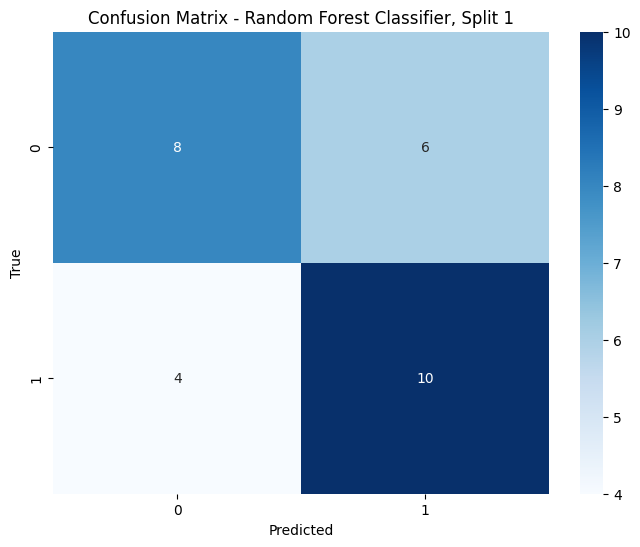

Output for split 2
25 out of 28 predictions correct
Accuracy: 0.8928571428571429
[[11  3]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.82      1.00      0.90        14

    accuracy                           0.89        28
   macro avg       0.91      0.89      0.89        28
weighted avg       0.91      0.89      0.89        28



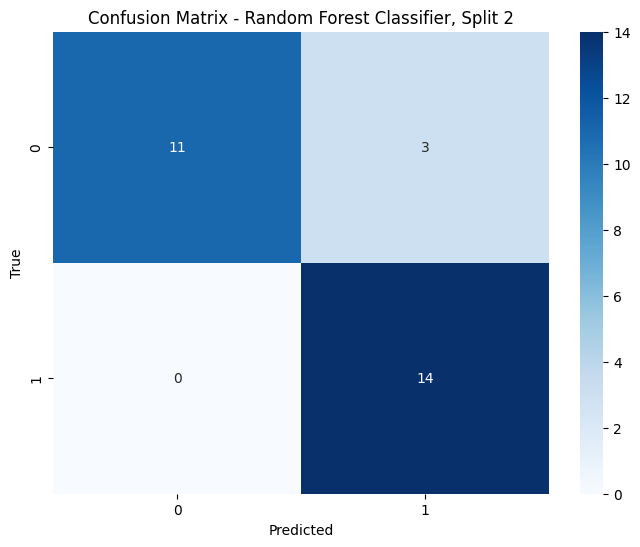

Output for split 3
24 out of 28 predictions correct
Accuracy: 0.8571428571428571
[[10  4]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.78      1.00      0.88        14

    accuracy                           0.86        28
   macro avg       0.89      0.86      0.85        28
weighted avg       0.89      0.86      0.85        28



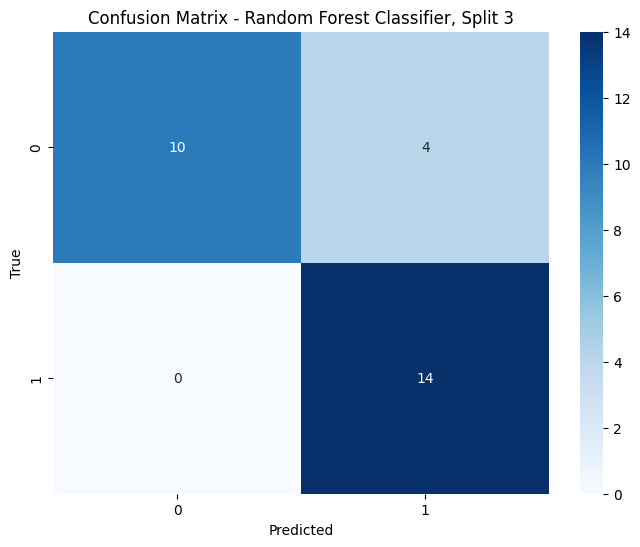

Output for split 4
26 out of 28 predictions correct
Accuracy: 0.9285714285714286
[[12  2]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.88      1.00      0.93        14

    accuracy                           0.93        28
   macro avg       0.94      0.93      0.93        28
weighted avg       0.94      0.93      0.93        28



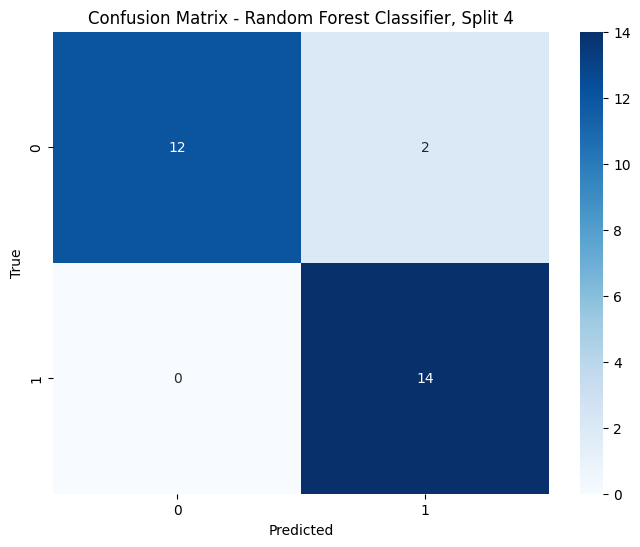

Output for split 5
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[12  2]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.85      0.85      0.85        13

    accuracy                           0.85        27
   macro avg       0.85      0.85      0.85        27
weighted avg       0.85      0.85      0.85        27



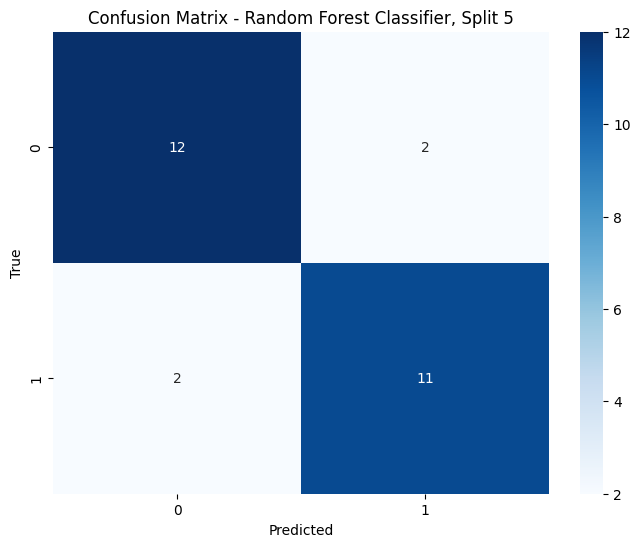

Output for split 6
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[10  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.76      1.00      0.87        13

    accuracy                           0.85        27
   macro avg       0.88      0.86      0.85        27
weighted avg       0.89      0.85      0.85        27



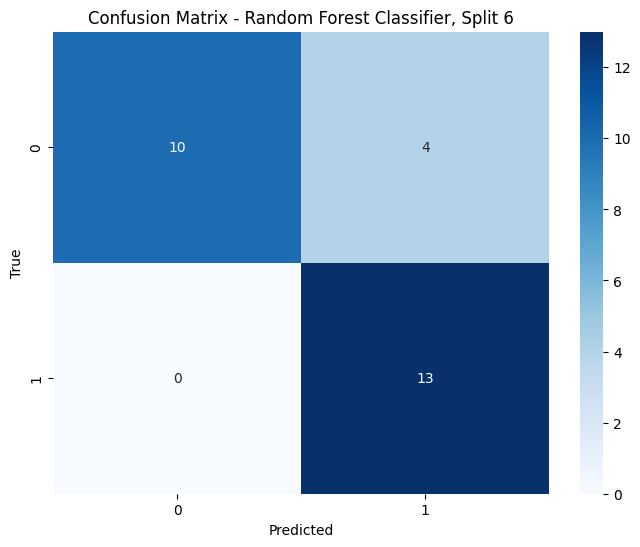

Output for split 7
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[13  1]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.91      0.77      0.83        13

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



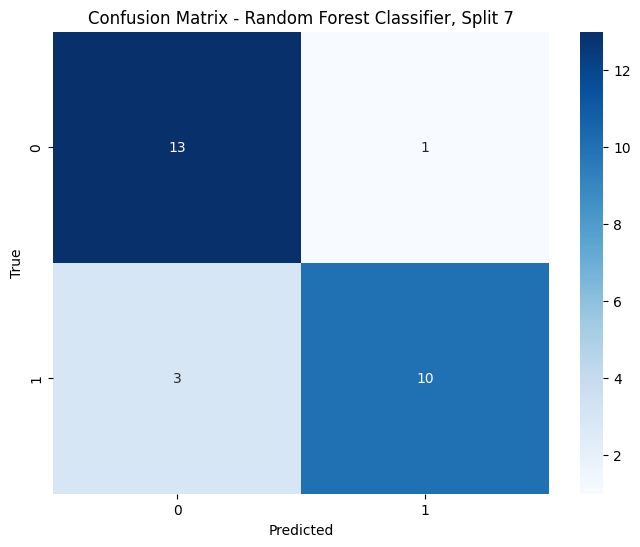

Output for split 8
22 out of 27 predictions correct
Accuracy: 0.8148148148148148
[[10  3]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.80      0.86      0.83        14

    accuracy                           0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27



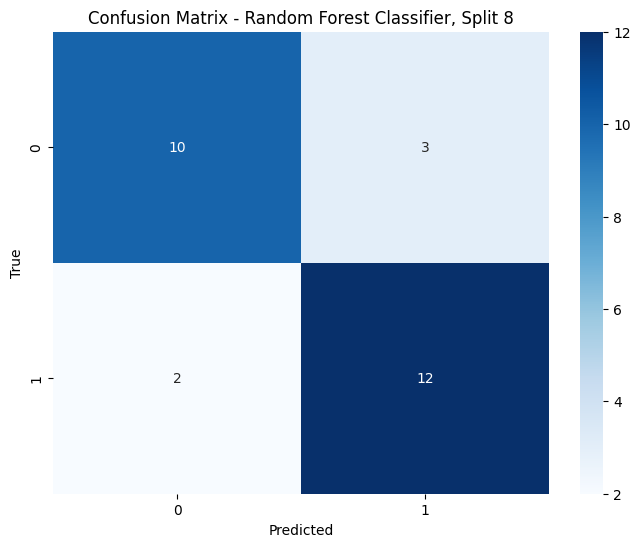

Output for split 9
26 out of 27 predictions correct
Accuracy: 0.9629629629629629
[[13  0]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



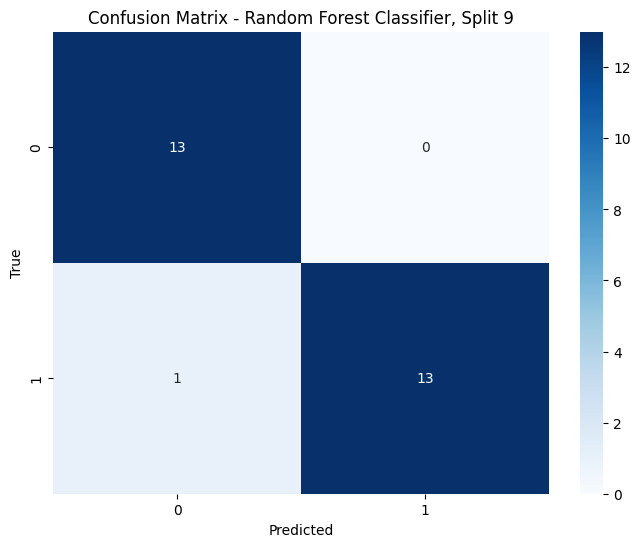

Output for split 10
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[12  1]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



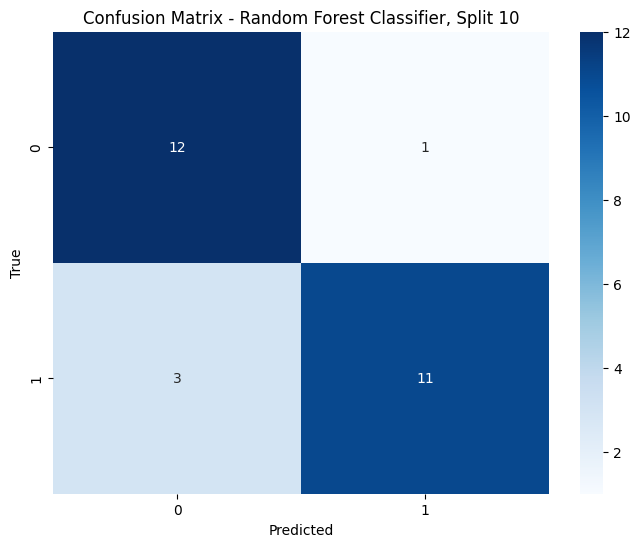

Final mean accuracy result: 0.8506613756613757
Best accuracy achieved: 0.9629629629629629


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1_class_0 and df1_class_1 are already defined
# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df_test_over = df_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df_test_over['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df_test_over.drop('Suicidal thoughts', axis=1)
y = df_test_over['Suicidal thoughts']

if __name__ == "__main__":
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = []

    for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
        # Extract training and testing data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE to the training data only
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

        print(f"Output for split {i}")

        # Initialize and train the RandomForestClassifier on the oversampled training data
        clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
        clf.fit(X_train_sm, y_train_sm)
        y_pred = clf.predict(X_test)

        # Calculate and store the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
        print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
        print("Accuracy:", accuracy)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
        plt.show()

    # Output final results
    print("Final mean accuracy result:", np.mean(scores))
    print("Best accuracy achieved:", np.max(scores))


Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64
Output for split 1
18 out of 28 predictions correct
Accuracy: 0.6428571428571429
[[ 8  6]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.62      0.71      0.67        14

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.64        28
weighted avg       0.65      0.64      0.64        28



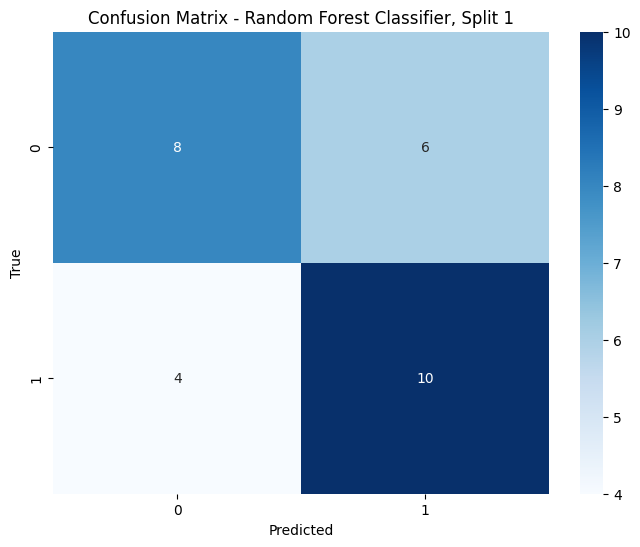

Output for split 2
25 out of 28 predictions correct
Accuracy: 0.8928571428571429
[[11  3]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.82      1.00      0.90        14

    accuracy                           0.89        28
   macro avg       0.91      0.89      0.89        28
weighted avg       0.91      0.89      0.89        28



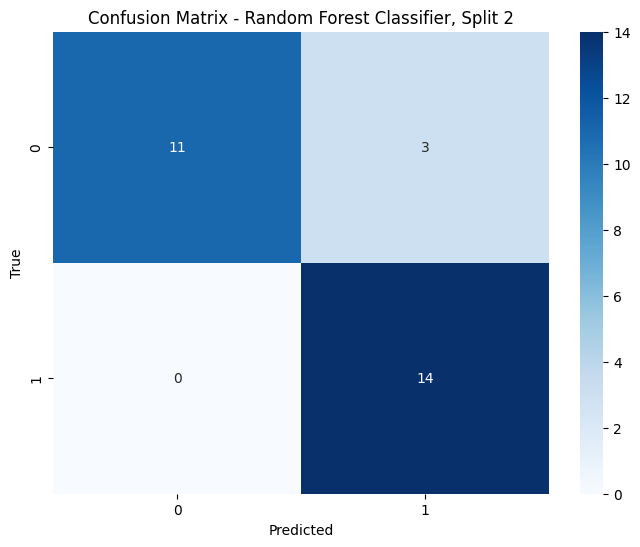

Output for split 3
24 out of 28 predictions correct
Accuracy: 0.8571428571428571
[[10  4]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.78      1.00      0.88        14

    accuracy                           0.86        28
   macro avg       0.89      0.86      0.85        28
weighted avg       0.89      0.86      0.85        28



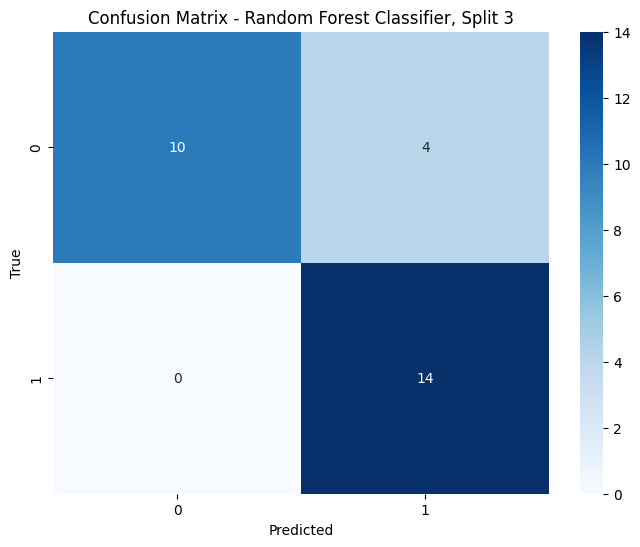

Output for split 4
26 out of 28 predictions correct
Accuracy: 0.9285714285714286
[[12  2]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.88      1.00      0.93        14

    accuracy                           0.93        28
   macro avg       0.94      0.93      0.93        28
weighted avg       0.94      0.93      0.93        28



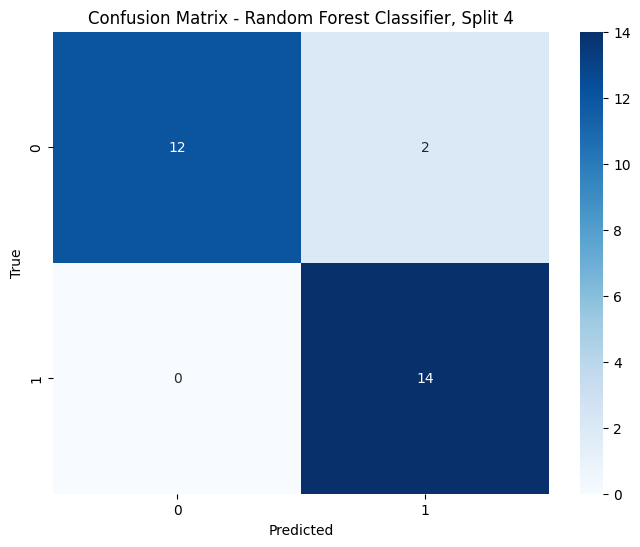

Output for split 5
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[12  2]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.85      0.85      0.85        13

    accuracy                           0.85        27
   macro avg       0.85      0.85      0.85        27
weighted avg       0.85      0.85      0.85        27



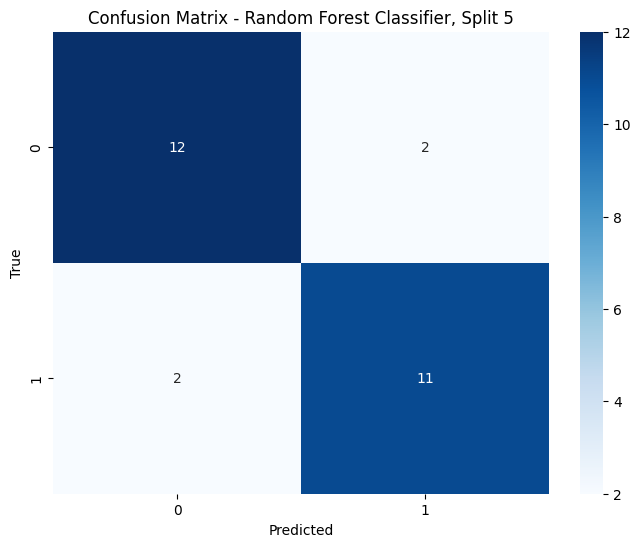

Output for split 6
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[10  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.76      1.00      0.87        13

    accuracy                           0.85        27
   macro avg       0.88      0.86      0.85        27
weighted avg       0.89      0.85      0.85        27



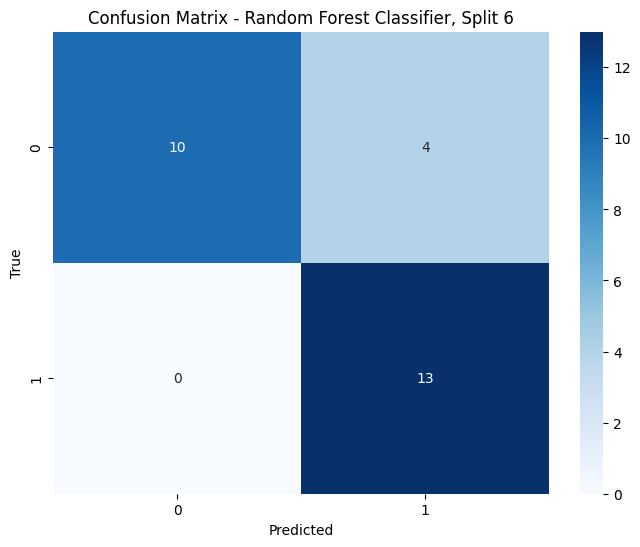

Output for split 7
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[13  1]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.91      0.77      0.83        13

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



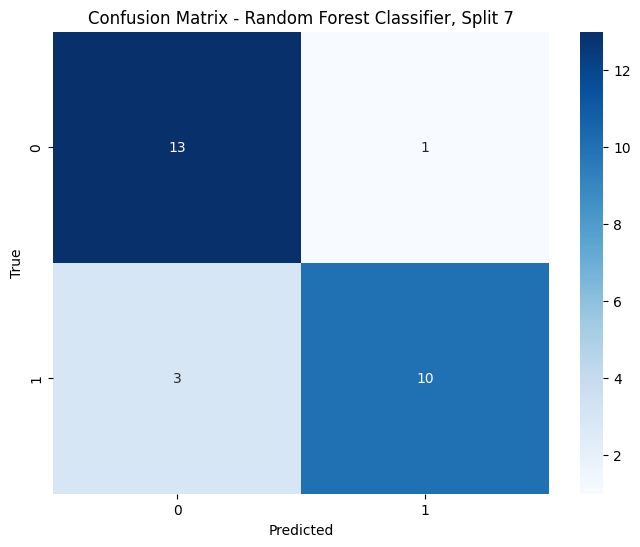

Output for split 8
22 out of 27 predictions correct
Accuracy: 0.8148148148148148
[[10  3]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.80      0.86      0.83        14

    accuracy                           0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27



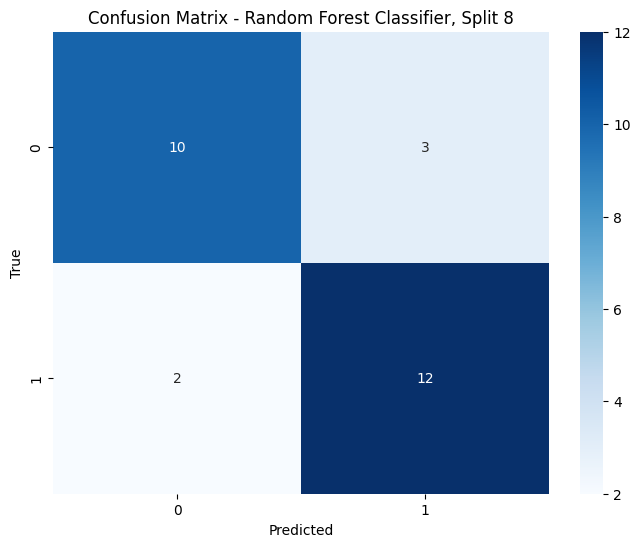

Output for split 9
26 out of 27 predictions correct
Accuracy: 0.9629629629629629
[[13  0]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



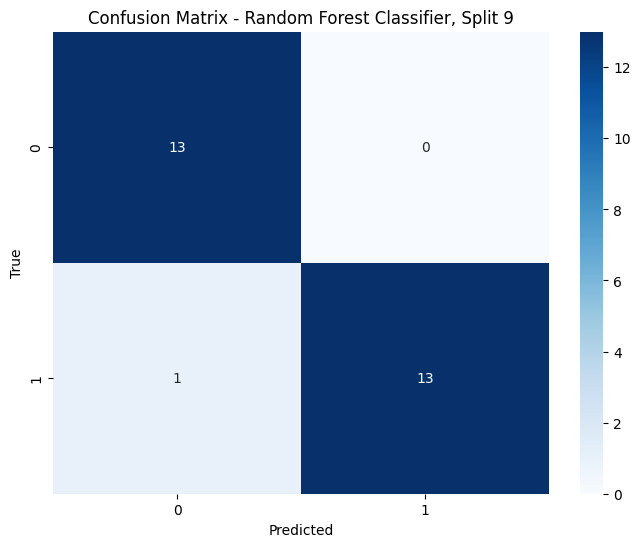

Output for split 10
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[12  1]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



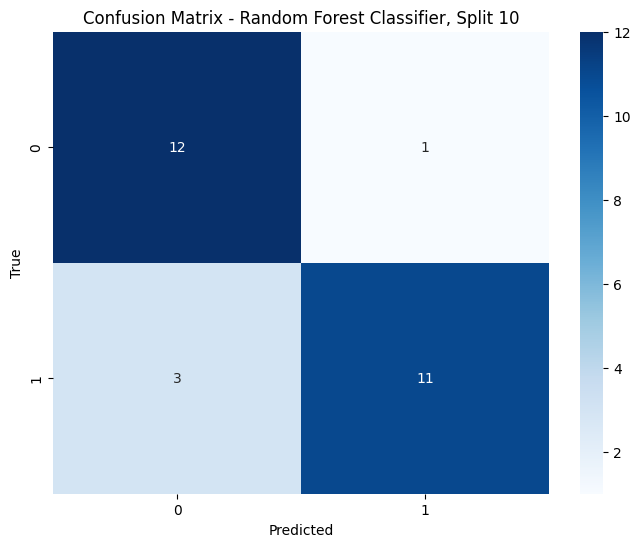

Final mean accuracy: 0.8506613756613757
Best single split accuracy: 0.9629629629629629


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Assuming df_class_1 is the minority class and df_class_0 is the majority class
# Define df_class_0 and df_class_1
df_class_0 = df1[df1['Suicidal thoughts'] == 0]
df_class_1 = df1[df1['Suicidal thoughts'] == 1]

# Oversample class 1 to match the size of class 0
df_class_1_over = df_class_1.sample(len(df_class_0), replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df_test_over = df_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df_test_over['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df_test_over.drop('Suicidal thoughts', axis='columns')
y = df_test_over['Suicidal thoughts']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data only
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train_sm, y_train_sm)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


Random over-sampling:
Suicidal thoughts
0    137
1    137
Name: count, dtype: int64
Output for split 1
18 out of 28 predictions correct
Accuracy: 0.6428571428571429
[[ 8  6]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.62      0.71      0.67        14

    accuracy                           0.64        28
   macro avg       0.65      0.64      0.64        28
weighted avg       0.65      0.64      0.64        28



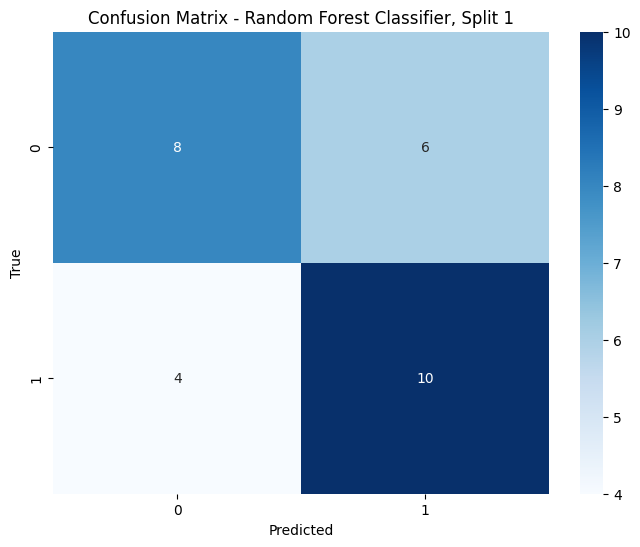

Output for split 2
25 out of 28 predictions correct
Accuracy: 0.8928571428571429
[[11  3]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.82      1.00      0.90        14

    accuracy                           0.89        28
   macro avg       0.91      0.89      0.89        28
weighted avg       0.91      0.89      0.89        28



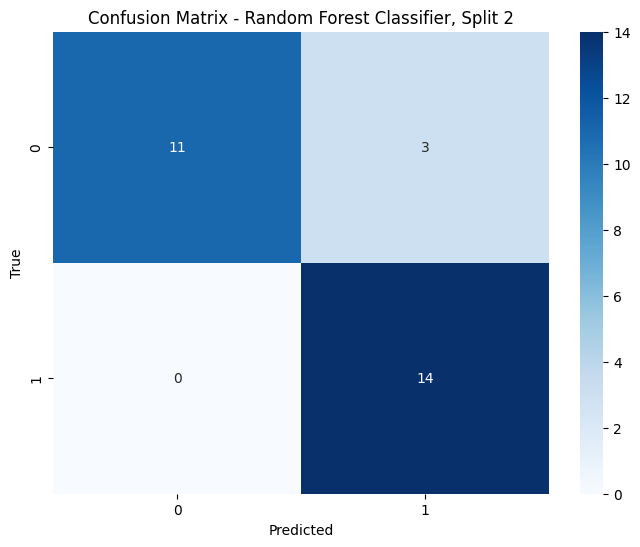

Output for split 3
24 out of 28 predictions correct
Accuracy: 0.8571428571428571
[[10  4]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.78      1.00      0.88        14

    accuracy                           0.86        28
   macro avg       0.89      0.86      0.85        28
weighted avg       0.89      0.86      0.85        28



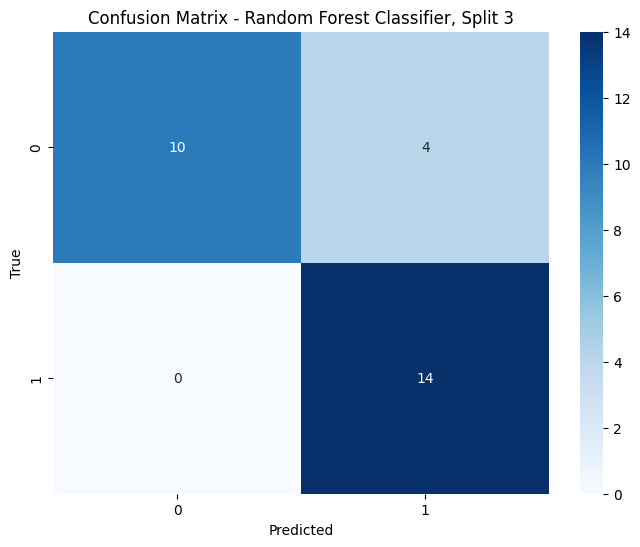

Output for split 4
26 out of 28 predictions correct
Accuracy: 0.9285714285714286
[[12  2]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.88      1.00      0.93        14

    accuracy                           0.93        28
   macro avg       0.94      0.93      0.93        28
weighted avg       0.94      0.93      0.93        28



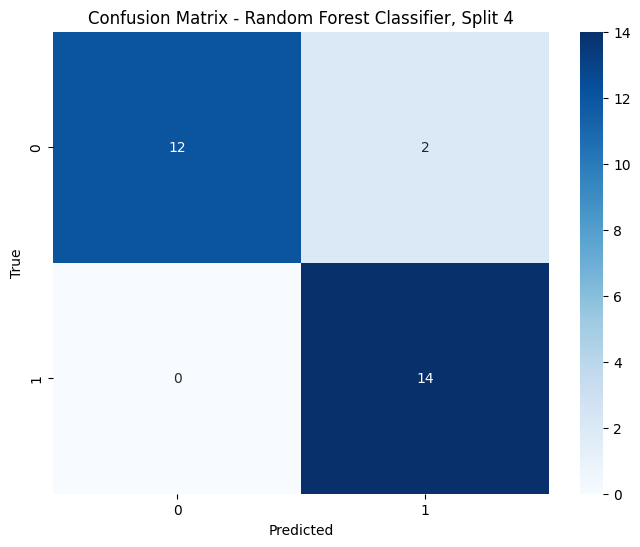

Output for split 5
25 out of 27 predictions correct
Accuracy: 0.9259259259259259
[[12  2]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.87      1.00      0.93        13

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.94      0.93      0.93        27



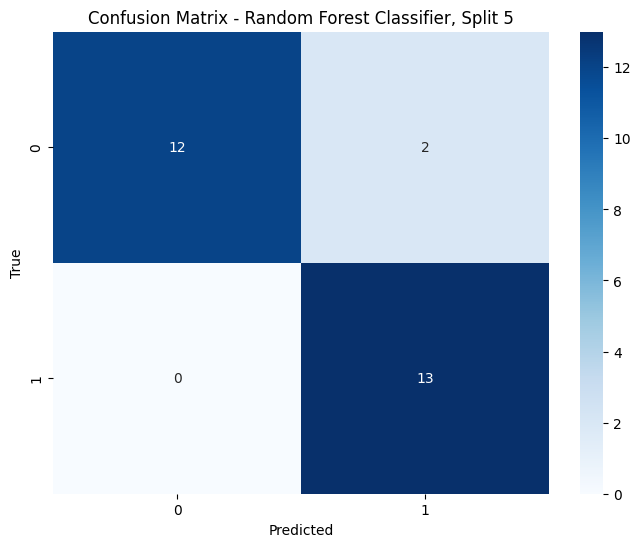

Output for split 6
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[10  4]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.76      1.00      0.87        13

    accuracy                           0.85        27
   macro avg       0.88      0.86      0.85        27
weighted avg       0.89      0.85      0.85        27



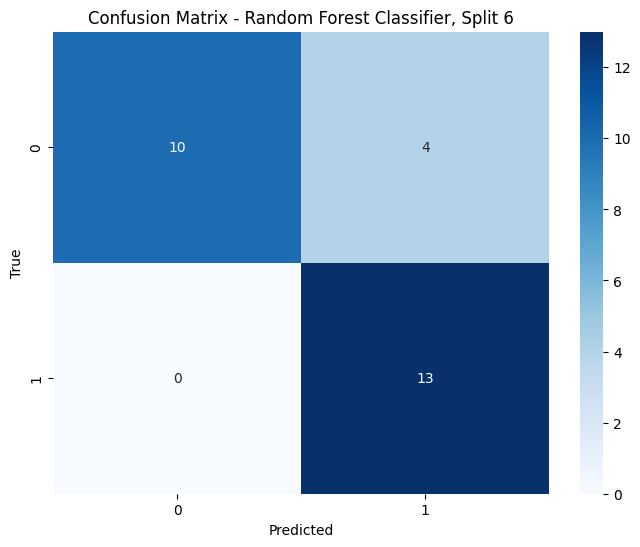

Output for split 7
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[13  1]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.91      0.77      0.83        13

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



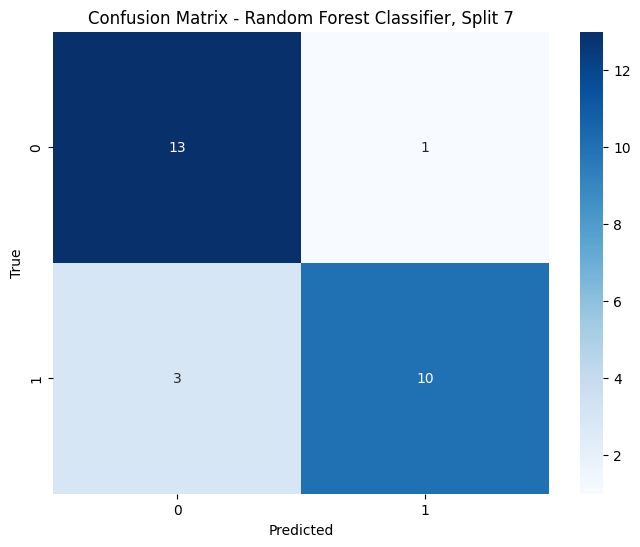

Output for split 8
22 out of 27 predictions correct
Accuracy: 0.8148148148148148
[[10  3]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.80      0.86      0.83        14

    accuracy                           0.81        27
   macro avg       0.82      0.81      0.81        27
weighted avg       0.82      0.81      0.81        27



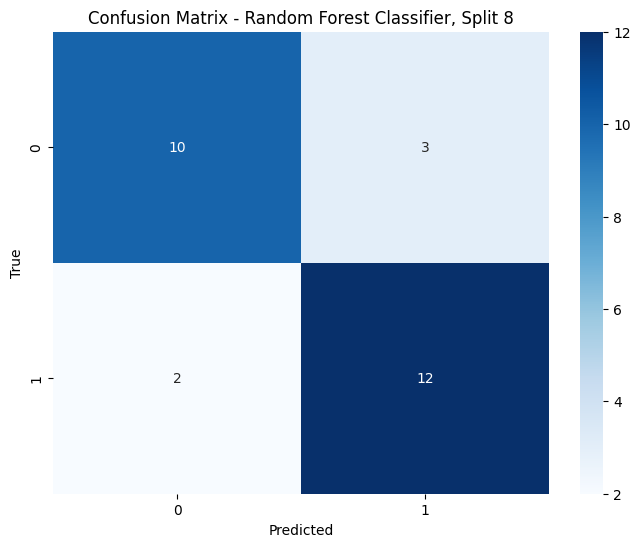

Output for split 9
26 out of 27 predictions correct
Accuracy: 0.9629629629629629
[[13  0]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



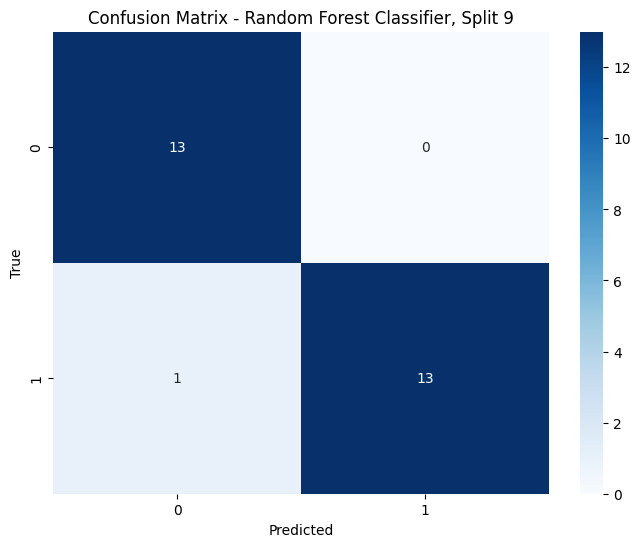

Output for split 10
23 out of 27 predictions correct
Accuracy: 0.8518518518518519
[[12  1]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.92      0.79      0.85        14

    accuracy                           0.85        27
   macro avg       0.86      0.85      0.85        27
weighted avg       0.86      0.85      0.85        27



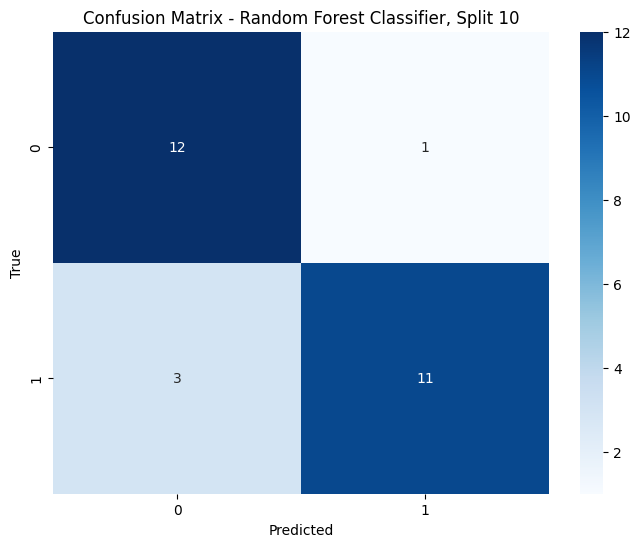

Final mean accuracy: 0.8580687830687831
Best single split accuracy: 0.9629629629629629
The balanced dataset has been saved as 'balanced_dataset.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df_class_1 is the minority class and df_class_0 is the majority class
# Oversample class 1 to match the size of class 0
df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df_balanced = pd.concat([df_class_0, df_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'Suicidal thoughts' to verify oversampling
print('Random over-sampling:')
print(df_balanced['Suicidal thoughts'].value_counts())

# Prepare features and target
X = df_balanced.drop('Suicidal thoughts', axis='columns')
y = df_balanced['Suicidal thoughts']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
final_mean_accuracy = np.mean(scores)
best_single_split_accuracy = np.max(scores)
print("Final mean accuracy:", final_mean_accuracy)
print("Best single split accuracy:", best_single_split_accuracy)

# Save the balanced dataset
df_balanced.to_csv('balanced_dataset.csv', index=False)

# Confirm the dataset is saved
print("The balanced dataset has been saved as 'balanced_dataset.csv'.")
